In [1]:
import os
import sys
import argparse
from os.path import dirname, realpath

sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))
%run load_Results.py
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression
from sklearn.isotonic import IsotonicRegression
#!pip install ml_insights
import ml_insights as mli

y01, p01 = calibration_curve(M_test1['golds'], tp1, n_bins = 20)
y02, p02 = calibration_curve(M_test2['golds'], tp2 , n_bins = 20)
y03, p03 =calibration_curve(M_test3['golds'], tp3 , n_bins = 20)
y04, p04 = calibration_curve(M_test4['golds'], tp4 , n_bins = 20)


In [2]:
from betacal import BetaCalibration
from  scipy.stats import beta
from matplotlib.pyplot import figure 


{'pred_probs': array([0.03580042, 0.070764  , 0.12136943, 0.17104232, 0.22115951,
        0.26696593, 0.31780119]),
 'emp_probs': array([0.00204825, 0.00722022, 0.01721939, 0.02514793, 0.03041825,
        0.06451613, 0.22222222]),
 'bin_counts': array([4394., 4709., 1568.,  676.,  263.,   62.,    9.])}

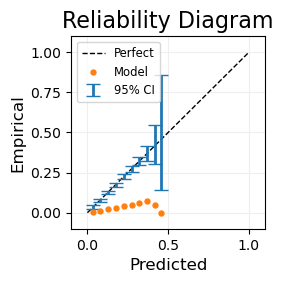

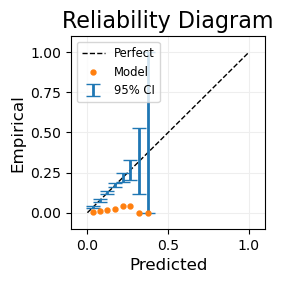

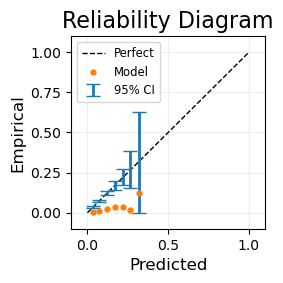

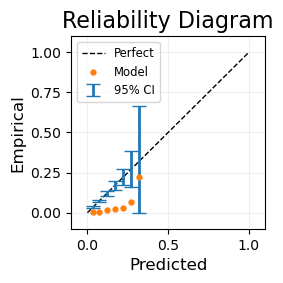

In [3]:
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test1['golds'], tp1)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test2['golds'], tp2)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test3['golds'], tp3)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test4['golds'], tp4)

In [4]:
neg_1 = mp1 [np.where(M1['golds']==0)]
neg_2 = mp2 [np.where(M2 ['golds']==0)]
neg_3 = mp3 [np.where(M3 ['golds']==0)]
neg_4 = mp4 [np.where(M4 ['golds']==0)]
pos_1 = mp1 [np.where(M1 ['golds']==1)]
pos_2 = mp2 [np.where(M2 ['golds']==1)]
pos_3 = mp3 [np.where(M3['golds']==1)]
pos_4 = mp4 [np.where(M4 ['golds']==1)]
### TRY BETA

In [5]:
def iso_smote_plot(pos, subneg, p_test, y_test, 
               synth_size, wei):
        
    a, b, loc, scale = beta.fit(pos   ) # floc=0, fscale=1)
    synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, synth_pos))
    #many_pos = synth_pos
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )
    inv_prob = np.sqrt(1/probs)

   # weights = np.where(subgold==1,inv_prob ,1)
    weights = np.where(subgold==1,wei ,1)

    iso =  IsotonicRegression(out_of_bounds = 'clip')
    iso.fit(   (probs), subgold, sample_weight = weights)
    iso_test = iso.predict(    ( p_test) )

    figure (figsize=(2.5,2.5))
    mli.plot_reliability_diagram(y_test,  iso_test) #, error_bars = False)
    return iso_test

In [6]:
w1 = np.mean(gold1)**.5
w2 = 2*np.mean(gold2)**.5
w3 = 3*np.mean(gold3)**.5
w4 = 4*np.mean(gold4)**.5

d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


array([0.08768739, 0.08768739, 0.08768739, ..., 0.08768739, 0.08768739,
       0.08768739])

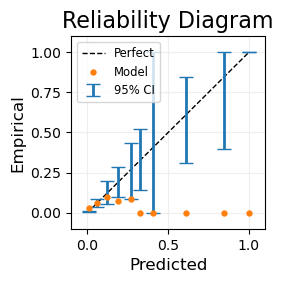

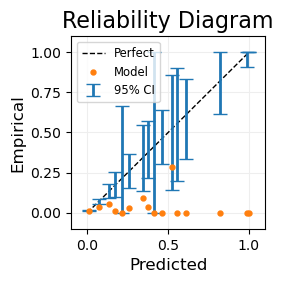

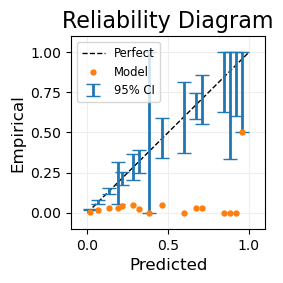

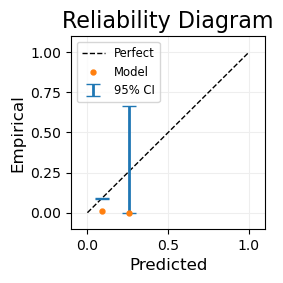

In [7]:
i1_1 = iso_smote_plot(pos_1, subneg=np.random.choice(neg_1, 80*sum(gold1)),
           p_test = tp1, y_test= M_test1['golds'],   synth_size=10, wei = w1) 

iso_smote_plot(pos_2, subneg=np.random.choice(neg_2, 50*sum(gold2)),
            p_test = tp2, y_test= M_test2['golds'],   synth_size=15, wei = w2)
iso_smote_plot(pos_3, subneg=np.random.choice(neg_3, 40*sum(gold3)),
            p_test = tp3, y_test= M_test3['golds'],   synth_size=15, wei = w3)
iso_smote_plot(pos_4, subneg=np.random.choice(neg_4, 40*sum(gold4)),
            p_test = tp4, y_test= M_test4['golds'],   synth_size=10, wei = w4)

In [8]:
def iso_smote(pos, subneg, p_test, 
               synth_size, wei):
        
    a, b, loc, scale = beta.fit(pos, floc=0, fscale=1)
    #a, b, loc, scale = beta.fit(pos) # floc=0, fscale=1)

    synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, synth_pos))
    #many_pos = synth_pos
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )
    
    weights = np.where(subgold==1, wei ,1)

    iso =  IsotonicRegression(out_of_bounds = 'clip')
    iso.fit(   (probs), subgold, sample_weight = weights)
    iso_test = iso.predict(    ( p_test) )

    return iso_test

In [9]:
w1

0.18251733570575093

{'pred_probs': array([0.02300116, 0.06172737, 0.11718512, 0.17137728, 0.23309879,
        0.26115313, 0.41674411, 1.        ]),
 'emp_probs': array([0.01426127, 0.04158328, 0.06593407, 0.        , 0.        ,
        0.        , 0.        , 0.        ]),
 'bin_counts': array([7.012e+03, 8.994e+03, 9.100e+01, 2.200e+01, 1.000e+00, 5.000e+00,
        5.000e+00, 2.000e+00])}

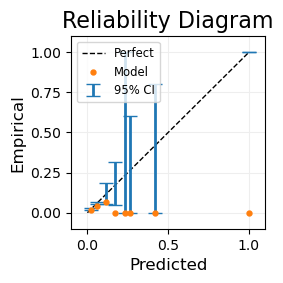

In [10]:
I1 = []
for i in range(100):
    I1.append(iso_smote(pos_1, subneg=np.random.choice(neg_1, 80*sum(gold1)),
            p_test = tp1,   synth_size=20, wei = w1))
IM1 = np.array( [l for l in I1])
MaxI1 = IM1.mean(0)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test1['golds'],  MaxI1)


{'pred_probs': array([0.01692181, 0.07478873, 0.11470484, 0.16589267, 0.21446092,
        0.26406538, 0.32895163, 0.39698368, 0.4003629 , 0.48060396,
        0.52817581, 0.55486413, 0.62325313]),
 'emp_probs': array([0.00515706, 0.01346729, 0.02549177, 0.02439024, 0.06896552,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]),
 'bin_counts': array([4.266e+03, 4.678e+03, 4.982e+03, 2.460e+02, 2.900e+01, 1.100e+01,
        3.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 2.000e+00,
        1.000e+00])}

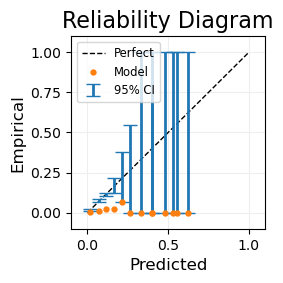

In [11]:
I2 = []
for i in range(200):
    I2.append(iso_smote(pos_2, subneg=np.random.choice(neg_2, 50*sum(gold2)),
            p_test = tp2,   synth_size=3, wei = 1))
IM2 = np.array( [l for l in I2])
MaxI2 = IM2.mean(0)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test2['golds'],  MaxI2)


#iso_smote_plot(pos_2, subneg=np.random.choice(neg_2, 50*sum(gold2)),
#            p_test = tp2, y_test= M_test2['golds'],   synth_size=15, wei = w2)

{'pred_probs': array([0.03020439, 0.07128224, 0.12443508, 0.17560089, 0.22257857,
        0.26396779, 0.3114118 , 0.36520968, 0.42218075, 0.46632622,
        0.62418857, 0.66990054]),
 'emp_probs': array([0.00464286, 0.00885897, 0.01492537, 0.02813853, 0.0376569 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ]),
 'bin_counts': array([5.600e+03, 2.822e+03, 1.809e+03, 2.310e+03, 2.390e+02, 3.500e+01,
        6.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00])}

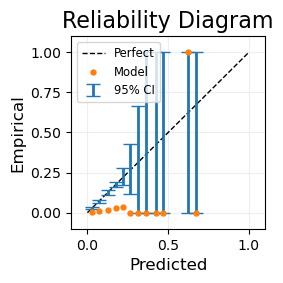

In [92]:
I3 = []
for i in range(250):
    #I3.append(iso_smote(pos_3,  np.random.choice(neg_3, 60*sum(gold3)), tp3 , 15,  w3))
    I3.append(iso_smote(pos_3,  np.random.choice(neg_3, 20*sum(gold3)), tp3 , 5,  w3))
IM3 = np.array( [l for l in I3])
MaxI3 = IM3.mean(0)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test3['golds'],  MaxI3)

In [88]:
from scipy import stats as stats

In [93]:

Trim3 = stats.trim_mean (IM3, .05 )

In [114]:
Trim3_b = stats.tmean (IM3, (.05, .95), axis=0)

{'pred_probs': array([0.06407115, 0.12443508, 0.17560089, 0.22257857, 0.26553664,
        0.31844481, 0.3617345 , 0.40184821,        nan]),
 'emp_probs': array([0.0074657 , 0.01492537, 0.02813853, 0.0376569 , 0.        ,
        0.        , 0.        , 1.        , 0.00403924]),
 'bin_counts': array([4.956e+03, 1.809e+03, 2.310e+03, 2.390e+02, 3.700e+01, 6.000e+00,
        5.000e+00, 1.000e+00, 3.466e+03])}

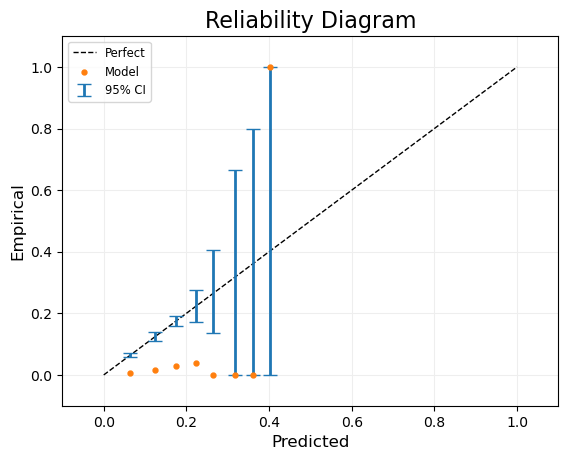

In [115]:
mli.plot_reliability_diagram(M_test3['golds'],  Trim3_b)

(array([7.234e+03, 2.410e+03, 2.837e+03, 3.300e+02, 1.600e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([0.0178612 , 0.07912502, 0.14038884, 0.20165267, 0.26291649,
        0.32418031, 0.38544413, 0.44670796, 0.50797178, 0.5692356 ,
        0.63049943]),
 <BarContainer object of 10 artists>)

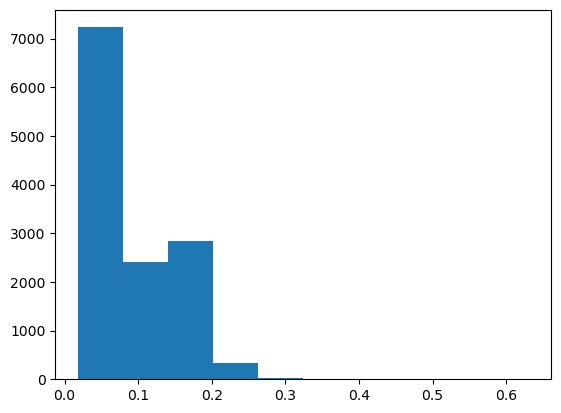

In [82]:
plt.hist(Trim3)

{'pred_probs': array([0.02839908, 0.07407635, 0.12311306, 0.17369751, 0.22195258,
        0.27615857, 0.3248259 , 0.41368113, 0.4636558 , 0.53229268,
        0.58463518, 0.69656978, 0.73158762, 0.83736404, 0.89844764,
        0.92533606]),
 'emp_probs': array([0.00300379, 0.01632779, 0.02764228, 0.01408451, 0.05797101,
        0.2       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        ]),
 'bin_counts': array([7.657e+03, 3.246e+03, 6.150e+02, 7.100e+01, 6.900e+01, 5.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 2.000e+00])}

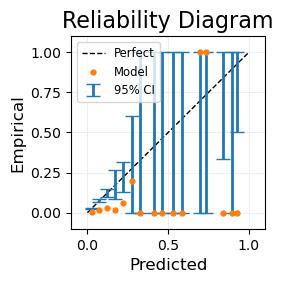

In [59]:
I4 = []
for i in range(200):
    I4.append(iso_smote(pos_4, subneg=np.random.choice(neg_4, 20*sum(gold4)),
            p_test = tp4 ,  synth_size=2, wei = w4))
IM4 = np.array( [l for l in I4])
MaxI4 = IM4.mean(0)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test4['golds'],  MaxI4)

In [35]:
bins_a = np.array([0,.1,.2,.3,.4, .5, .6, .7, .8, .9, 1])


In [47]:
MedI1 = np.median(IM1, axis = 0)

{'pred_probs': array([0.02407933, 0.07295564, 0.12578728, 0.31332516, 1.        ]),
 'emp_probs': array([0.02965784, 0.04854369, 0.        , 0.        , 0.        ]),
 'bin_counts': array([1.6016e+04, 1.0300e+02, 6.0000e+00, 5.0000e+00, 2.0000e+00])}

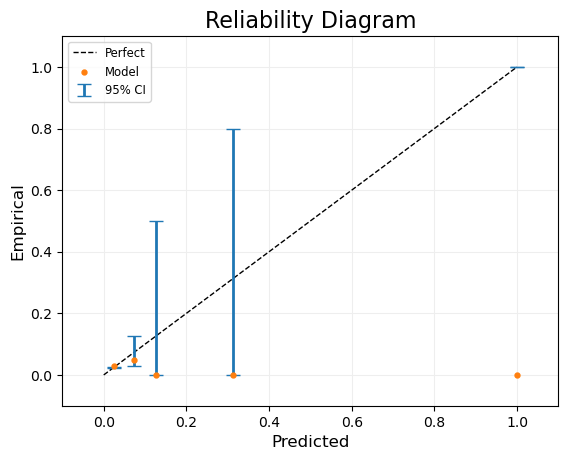

In [52]:
mli.plot_reliability_diagram(M_test1['golds'],  IM1[6])

{'pred_probs': array([0.02396601, 0.0626786 , 0.12363225, 0.24468592, 1.        ]),
 'emp_probs': array([0.02926799, 0.08333333, 0.        , 0.        , 0.        ]),
 'bin_counts': array([1.5956e+04, 1.5600e+02, 1.3000e+01, 5.0000e+00, 2.0000e+00])}

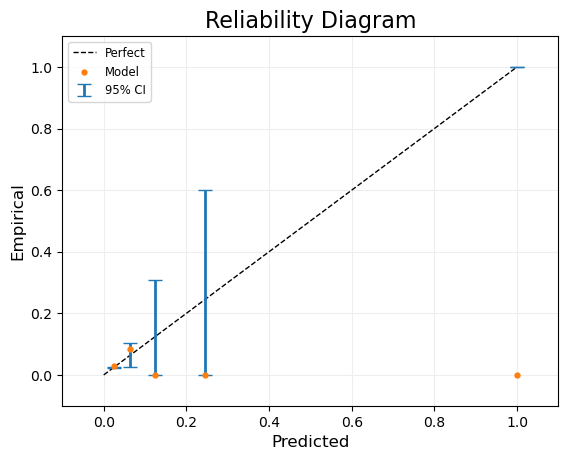

In [48]:
mli.plot_reliability_diagram(M_test1['golds'],  MedI1)

{'pred_probs': array([0.0269199 , 0.12475942, 0.28716462, 0.70350388, 1.        ]),
 'emp_probs': array([0.02974302, 0.04166667, 0.        , 0.        , 0.        ]),
 'bin_counts': array([1.6071e+04, 4.8000e+01, 6.0000e+00, 5.0000e+00, 2.0000e+00])}

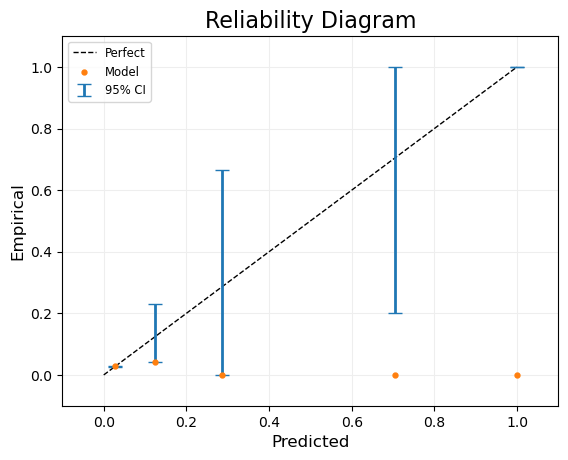

In [37]:
mli.plot_reliability_diagram(M_test1['golds'],  MaxI1, bins = bins_a)

{'pred_probs': array([0.05018477, 0.11694228, 0.25644495, 0.34857789, 0.45491938,
        0.50298064, 0.71589831]),
 'emp_probs': array([0.01459428, 0.03944773, 0.        , 0.        , 0.        ,
        0.        , 0.        ]),
 'bin_counts': array([1.3704e+04, 5.0700e+02, 4.0000e+00, 2.0000e+00, 5.0000e+00,
        3.0000e+00, 1.0000e+00])}

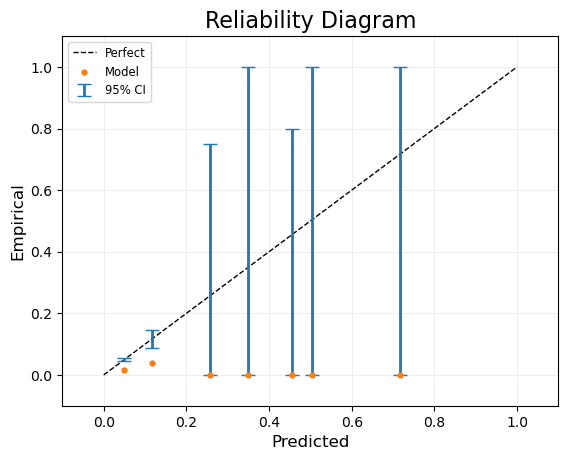

In [36]:
mli.plot_reliability_diagram(M_test2['golds'],  MaxI2, bins = bins_a)

{'pred_probs': array([0.05798144, 0.14401514, 0.25349712, 0.34977528, 0.46356052,
        0.55560488, 0.68631752, 0.73774357, 1.        ]),
 'emp_probs': array([0.00471781, 0.01005025, 0.02391041, 0.03030303, 0.02631579,
        0.        , 0.        , 0.        , 0.14285714]),
 'bin_counts': array([5.723e+03, 3.383e+03, 3.304e+03, 3.630e+02, 3.800e+01, 1.000e+00,
        7.000e+00, 3.000e+00, 7.000e+00])}

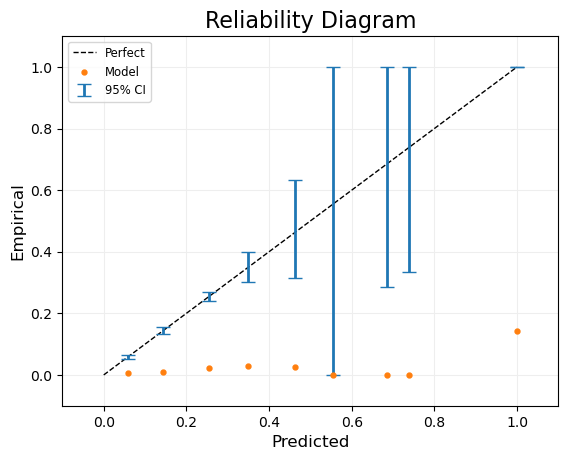

In [26]:
mli.plot_reliability_diagram(M_test3['golds'],  MaxI3, bins = bins_a)

{'pred_probs': array([0.05392564, 0.14309894, 0.22599802, 0.32219175, 0.45536296,
        0.52312149, 0.64470337, 0.73341826, 0.95934678]),
 'emp_probs': array([0.00362801, 0.01833276, 0.02997859, 0.05128205, 0.        ,
        0.        , 1.        , 0.        , 0.        ]),
 'bin_counts': array([8.269e+03, 2.891e+03, 4.670e+02, 3.900e+01, 3.000e+00, 4.000e+00,
        2.000e+00, 3.000e+00, 3.000e+00])}

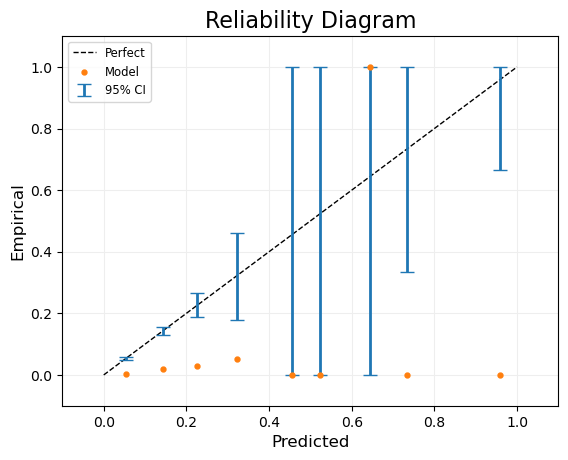

In [25]:
mli.plot_reliability_diagram(M_test4['golds'],  MaxI4, bins = bins_a)

d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


array([0.08759533, 0.08759533, 0.08759533, ..., 0.08759533, 0.08759533,
       0.08759533])

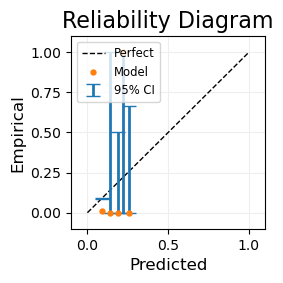

In [15]:
iso_smote_plot(pos_4, subneg=np.random.choice(neg_4, 40*sum(gold4)),
            p_test = tp4, y_test= M_test4['golds'],   synth_size=10, wei = w4)

{'pred_probs': array([0.04686672, 0.06117862, 0.13149783, 0.16873517, 0.21384351,
        0.2930527 , 0.31964738, 0.38359141, 0.46312619, 0.55042322,
        1.        ]),
 'emp_probs': array([0.00258398, 0.00461384, 0.01782985, 0.01747573, 0.02818991,
        0.        , 0.09677419, 0.        , 0.        , 0.13043478,
        0.        ]),
 'bin_counts': array([3.483e+03, 4.985e+03, 1.963e+03, 5.150e+02, 6.740e+02, 1.000e+00,
        3.100e+01, 1.000e+00, 1.000e+00, 2.300e+01, 4.000e+00])}

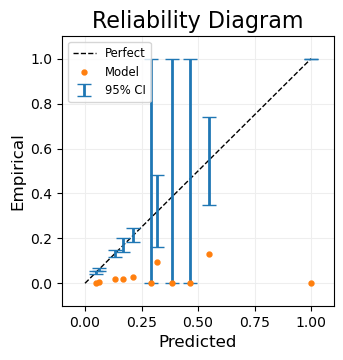

In [16]:
IM4
figure (figsize=(3.5,3.5))
mli.plot_reliability_diagram(M_test4['golds'],  IM4[0])

{'pred_probs': array([0.04560588, 0.07448588, 0.12823193, 0.1882372 , 0.21986   ,
        0.2672435 , 0.43259567, 0.59531967, 0.67729696, 1.        ]),
 'emp_probs': array([0.00241741, 0.00497512, 0.01708333, 0.02669209, 1.        ,
        0.02325581, 1.        , 1.        , 0.        , 0.        ]),
 'bin_counts': array([4.964e+03, 3.216e+03, 2.400e+03, 1.049e+03, 1.000e+00, 4.300e+01,
        1.000e+00, 1.000e+00, 3.000e+00, 3.000e+00])}

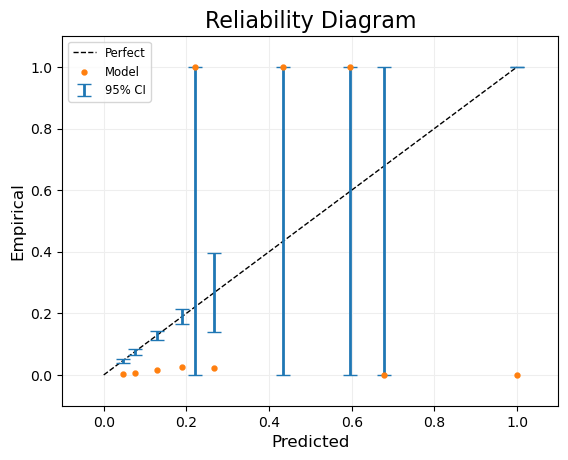

In [17]:
mli.plot_reliability_diagram(M_test4['golds'],  IM4[3])
 

{'pred_probs': array([0.03867857, 0.07590757, 0.13783486, 0.1931658 , 0.21127514,
        0.27297879, 0.32750498, 0.41114343, 0.83211529, 1.        ]),
 'emp_probs': array([0.00239139, 0.00623701, 0.01838671, 0.        , 0.02654028,
        0.05769231, 1.        , 0.13333333, 0.        , 0.        ]),
 'bin_counts': array([5.018e+03, 3.848e+03, 1.686e+03, 3.000e+00, 1.055e+03, 5.200e+01,
        1.000e+00, 1.500e+01, 1.000e+00, 2.000e+00])}

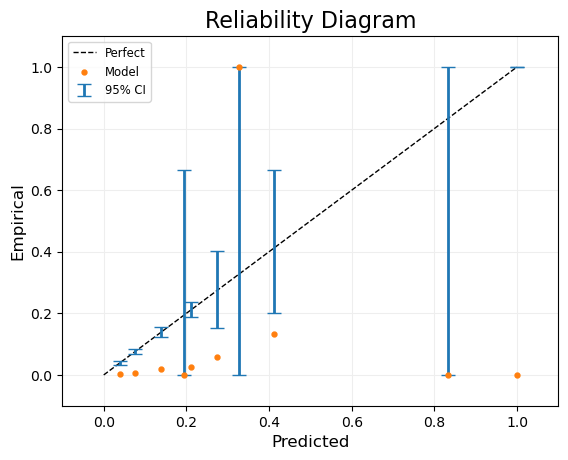

In [19]:
mli.plot_reliability_diagram(M_test4['golds'],  IM4[2] )

(array([9.005e+03, 2.604e+03, 5.300e+01, 1.600e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([0.03605974, 0.13245377, 0.22884779, 0.32524182, 0.42163584,
        0.51802987, 0.6144239 , 0.71081792, 0.80721195, 0.90360597,
        1.        ]),
 <BarContainer object of 10 artists>)

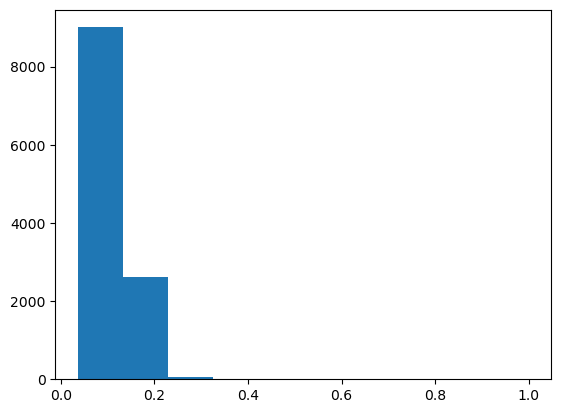

In [21]:
plt.hist(IM4[2])

In [17]:
IM1_save = IM1

In [18]:
np.shape(IM1_save)

(50, 16132)

In [ ]:
IM1_med = np.median(IM1, axis = 0)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test1['golds'],  IM1_med)
